In [207]:
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [208]:
# hyper parameters
num_bandits = 10
mean = 0
var = 0.5
initial=5
np.random.seed(42)

Means:  [-0.25091976  0.90142861  0.46398788  0.19731697 -0.68796272 -0.68801096
 -0.88383278  0.73235229  0.20223002  0.41614516]
Optimal:  0


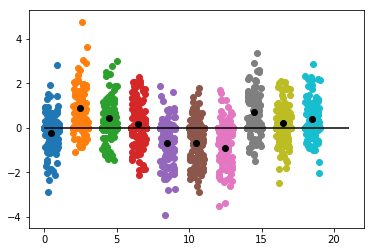

In [209]:
# choose random means in [-1,1)
means = np.random.random(num_bandits)*2 - 1 
opt_act = np.argmax(means)
print('Means: ', means)
print('Optimal: ', opt_action)
# display the means
samples = np.zeros((num_bandits,1000))
for i in range(100):
  samples[:,i] = np.random.normal(means,np.ones(num_bandits))
for i in range(num_bandits):
  plt.scatter(2*i+np.random.rand(1000),samples[i,:])
  plt.scatter(2*i+0.5,means[i],c='k')
plt.hlines(0,0,2*num_bandits+1)  
plt.show()

In [210]:
def reward(bandit):
  return np.random.normal(means[bandit],1)

In [211]:
def plot_bandits(avg_rewards,avg_acts):
    plt.subplot(211)
    plt.xlabel('epochs')
    plt.ylabel('Average reward')    
    for avg_reward in avg_rewards:    
        plt.plot(np.arange(len(avg_reward)),avg_reward)
    plt.subplot(212)
    plt.xlabel('epochs')
    plt.ylabel('% optimal action')
    for avg_act in avg_acts:    
        plt.plot(np.arange(len(avg_act)),avg_act)    
    plt.gca().set_ylim((0,1))
    plt.show()

In [212]:
# define the algorithm
def run_bandits(epochs=2000, itr=1000, init_val=0, epsilon=0.01, every_n=500, plot=True):
    # define the value function
    avg_reward = [0.0 for i in range(itr)]
    avg_opt = [0.0 for i in range(itr)]
    for epoch in range(1,epochs+1):
        rew_total = 0
        Q  = init_val * np.ones(num_bandits)
        num = [0 for a in range(num_bandits)]
        
        for n in range(1,itr+1):
            if np.random.rand() < epsilon:
                A = np.random.randint(num_bandits)
            else:
                # argmax returns the first instance instead of breaking ties arbitrarily
                #action = np.argmax(value_function)
                A = np.random.choice(np.flatnonzero(Q == Q.max()))
            R = reward(A)
            num[A] += 1
            Q[A] += (R-Q[A])/num[A]
            rew_total += R
            if A == opt_act:
                avg_opt[n-1] += 1/epochs
            avg_reward[n-1] = (avg_reward[n-1]*(epoch-1) + rew_total/n) / epoch
        if not epoch%every_n:
            print(f'epoch {epoch} / {epochs}')
    return avg_reward,avg_opt

In [213]:
r1,a1 = run_bandits(init_val=initial,epochs=2000,epsilon=0.1)
r2,a2 = run_bandits(init_val=initial,epochs=2000,epsilon=0.01)
r3,a3 = run_bandits(init_val=initial,epochs=2000,epsilon=0)

epoch 500 / 2000
epoch 1000 / 2000
epoch 1500 / 2000
epoch 2000 / 2000
epoch 500 / 2000
epoch 1000 / 2000
epoch 1500 / 2000
epoch 2000 / 2000
epoch 500 / 2000
epoch 1000 / 2000
epoch 1500 / 2000
epoch 2000 / 2000


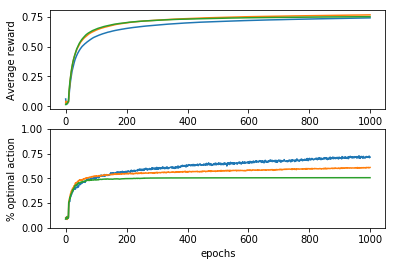

In [214]:
plot_bandits([r1,r2,r3],[a1,a2,a3])